# 2048

by [Dipsy](https://github.com/dipsywong98)

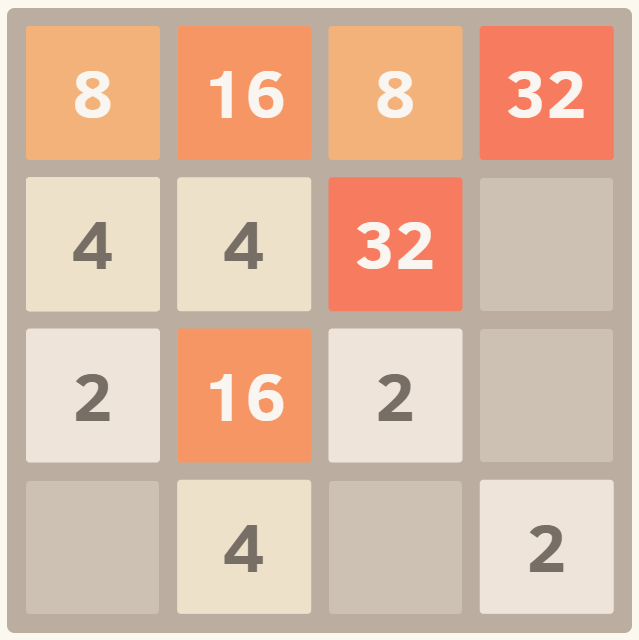

https://play2048.co/

## Introduction

2048 is an interesting game, why not we make our own in Python!

In this jupyter notebook, we will guide you to build all the essential parts in 2048 game, and assemble all the parts together, and at last we will have our playable 2048 game!

## Step 0 - Utility functions

First we will need to initialize the following utility functions to help us run tests - to ensure we implement our logics correctly!

We implemented them for you, and you may study its internal logics if you are interested

In [ ]:
from utils import (
    assert_eq,
    assert_next_grid,
    assert_next_state,
    create_empty_row,
    create_empty_grid,
    flatten,
    filterna
)

## Step 1 - handle the merge left operation on a row

In a 2048 game, we can use a 2D array of integers to represent the 4x4 game grid, and we use `None` to denote there is no number in the cell. For example,

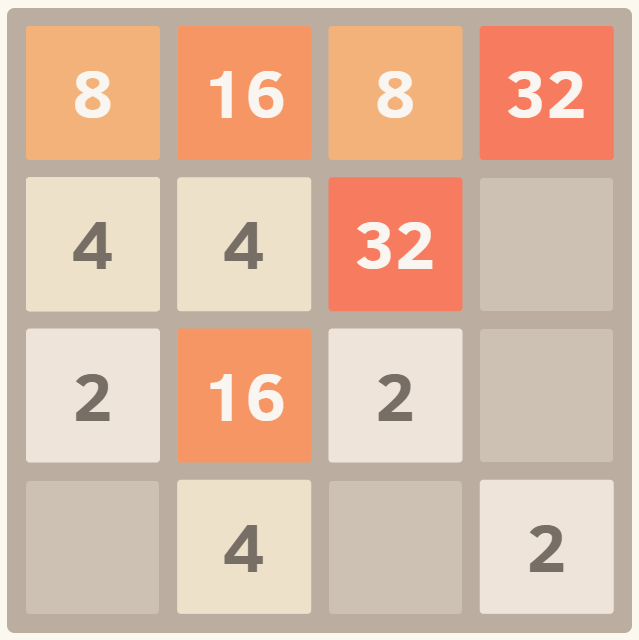

can be represented with

```python
grid = [
  [8, 16, 8, 32],
  [4, 4, 32, None],
  [2, 16, 2, None],
  [None, 4, None, 2],
]

```

Now lets work on the most fundamental procedure in 2048 - merging numbers on a single row during swipe left, we call this procedure `merge_row_left`. When merging left, all numbers will move towards the left, and neighboring identical numbers will merge together by adding their values! Pay attention to those edge cases as well!

### `merge_row_left(row)`

* `row` is a single row in the 2048 grid
* it should return the new row after merging left

<details>
<summary>hint 1</summary>
You can select only the non None elements and do the merging, and then put back the None's until the new row is of length 4
</details>

<details>
<summary>hint 2</summary>
use queue pop and top concept to check is the next number mergable
</details>

<details>
<summary>hint 3</summary>
One working algorithm works as follows:

1. create an empty array `new_row` which will be the result of the function
2. get all non empty numbers in the row, store it in array `non_empty`
3. treat `non_empty` as a queue. while it is non empty, pop the front as `current`, compare it with the new front element in the queue. If they are the same, means we need to merge them, we need to pop the new front and append merged result to `new_row`. Otherwise we can just append  `current` to `new_row`.
4. append None to the `new_row` array until it becomes length 4
</details>

In [ ]:
def merge_row_left(row):
    # your implementation here
    return row

# Base case, numbers should become left packed
assert_eq(merge_row_left([None, 2, None, 4]), [2, 4, None, None])

# Base case, same number should collapse and add together
assert_eq(merge_row_left([None, 2, None, 2]), [4, None, None, None])
assert_eq(merge_row_left([2, 4, 4, 2]), [2, 8, 2, None])

# Edge case, empty row should remain empty
assert_eq(merge_row_left([None, None, None, None]), [None, None, None, None])

# Edge case, full row should remain the same
assert_eq(merge_row_left([2, 4, 2, 4]), [2, 4, 2, 4])

# Edge case, 4 identicals mean can collapse twice
assert_eq(merge_row_left([2, 2, 2, 2]), [4, 4, None, None])

# Edge case, 3 identicals should merge those more left first
assert_eq(merge_row_left([None, 2, 2, 2]), [4, 2, None, None])

# Edge case, result of merged should not merge again in the same swipe
assert_eq(merge_row_left([2, 2, 4, None]), [4, 4, None, None])
assert_eq(merge_row_left([4, 2, None, 2]), [4, 4, None, None])


## Step 2 - handle the merge left operation on the whole grid

Now we know how to handle merge in a row perspective, we can apply merge_row_left on all the rows, that is the whole grid, then we produce a new grid on swiping left!

### `merge_grid_left(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging left

In [ ]:
def merge_grid_left(grid):
    # your implementation here
    return grid

assert_eq(merge_grid_left(
    [
        [None, 2, None, 4],
        [None, 2, None, 2],
        [2, 4, 4, 2],
        [None, None, None, None],
    ]
), [
    [2, 4, None, None],
    [4, None, None, None],
    [2, 8, 2, None],
    [None, None, None, None]
])

## Step 3 - handle the merge right operation

We have our experience in handling merge left, shall we do merge right?

### `merge_row_left(row)`

* `row` is a single row in the 2048 grid
* it should return the new row after merging right

<details>
<summary>hint 1</summary>
Can we reuse the `merge_row_left` function?
</details>

<details>
<summary>hint 2</summary>
Use reverse
</details>

<details>
<summary>hint 3</summary>
Take we are merging right on [2, None, 2, 4] as example, the result should be [4, 4, None, None]. if we reverse the row, it becomes [4, 2, None, 2], merging left on this will be [None, None, 4, 4], which is the same as reverse of original problem.
</details>


In [ ]:
def merge_row_right(row):
    # your implementation here
    return row

# Base case, numbers should become right packed
assert_eq(merge_row_right([None, 2, None, 4]), [None, None, 2, 4])

# Base case, same number should collapse and add together
assert_eq(merge_row_right([None, 2, None, 2]), [None, None, None, 4])
assert_eq(merge_row_right([2, 4, 4, 2]), [None, 2, 8, 2])

# Edge case, empty row should remain empty
assert_eq(merge_row_right([None, None, None, None]), [None, None, None, None])

# Edge case, full row should remain the same
assert_eq(merge_row_right([2, 4, 2, 4]), [2, 4, 2, 4])

# Edge case, 4 identicals mean can collapse twice
assert_eq(merge_row_right([2, 2, 2, 2]), [None, None, 4, 4])

# Edge case, 3 identicals should merge those more right first
assert_eq(merge_row_right([None, 2, 2, 2]), [None, None, 2, 4])

# Edge case, result of merged should not merge again in the same swipe
assert_eq(merge_row_right([2, 2, 4, None]), [None, None, 4, 4])
assert_eq(merge_row_right([4, 2, None, 2]), [None, None, 4, 4])


### `merge_grid_right(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging right

In [ ]:
def merge_grid_right(grid):
    # your implementation here
    return grid

assert_eq(merge_grid_right(
    [
        [None, 2, None, 4],
        [None, 2, None, 2],
        [2, 4, 4, 2],
        [None, None, None, None],
    ]
), [
    [None, None, 2, 4],
    [None, None, None, 4],
    [None, 2, 8, 2],
    [None, None, None, None]
])

## Step 4 - handle the merge up and merge down operation

Now implement the merge up and merge down function.


### `merge_grid_up(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging up

<details>
<summary>hint 1</summary>
Can we reuse the `merge_grid_left` and `merge_grid_right` function?
</details>

<details>
<summary>hint 2</summary>
Use transpose. Transpose is reflecting the grid along the diagonal axis. It can change a 2d array from row major into a column major representation. That means each column in original grid is now a row in the new grid.

And if we do transpose on a transposed grid, we can get the original grid.

You can use the following snippet to start coding your transpose function

```python
def transpose(grid):
    # your implementation here
    return grid

assert_eq(transpose([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
]), [
    [1, 5, 9, 13],
    [2, 6, 10, 14],
    [3, 7, 11, 15],
    [4, 8, 12, 16],
])
```


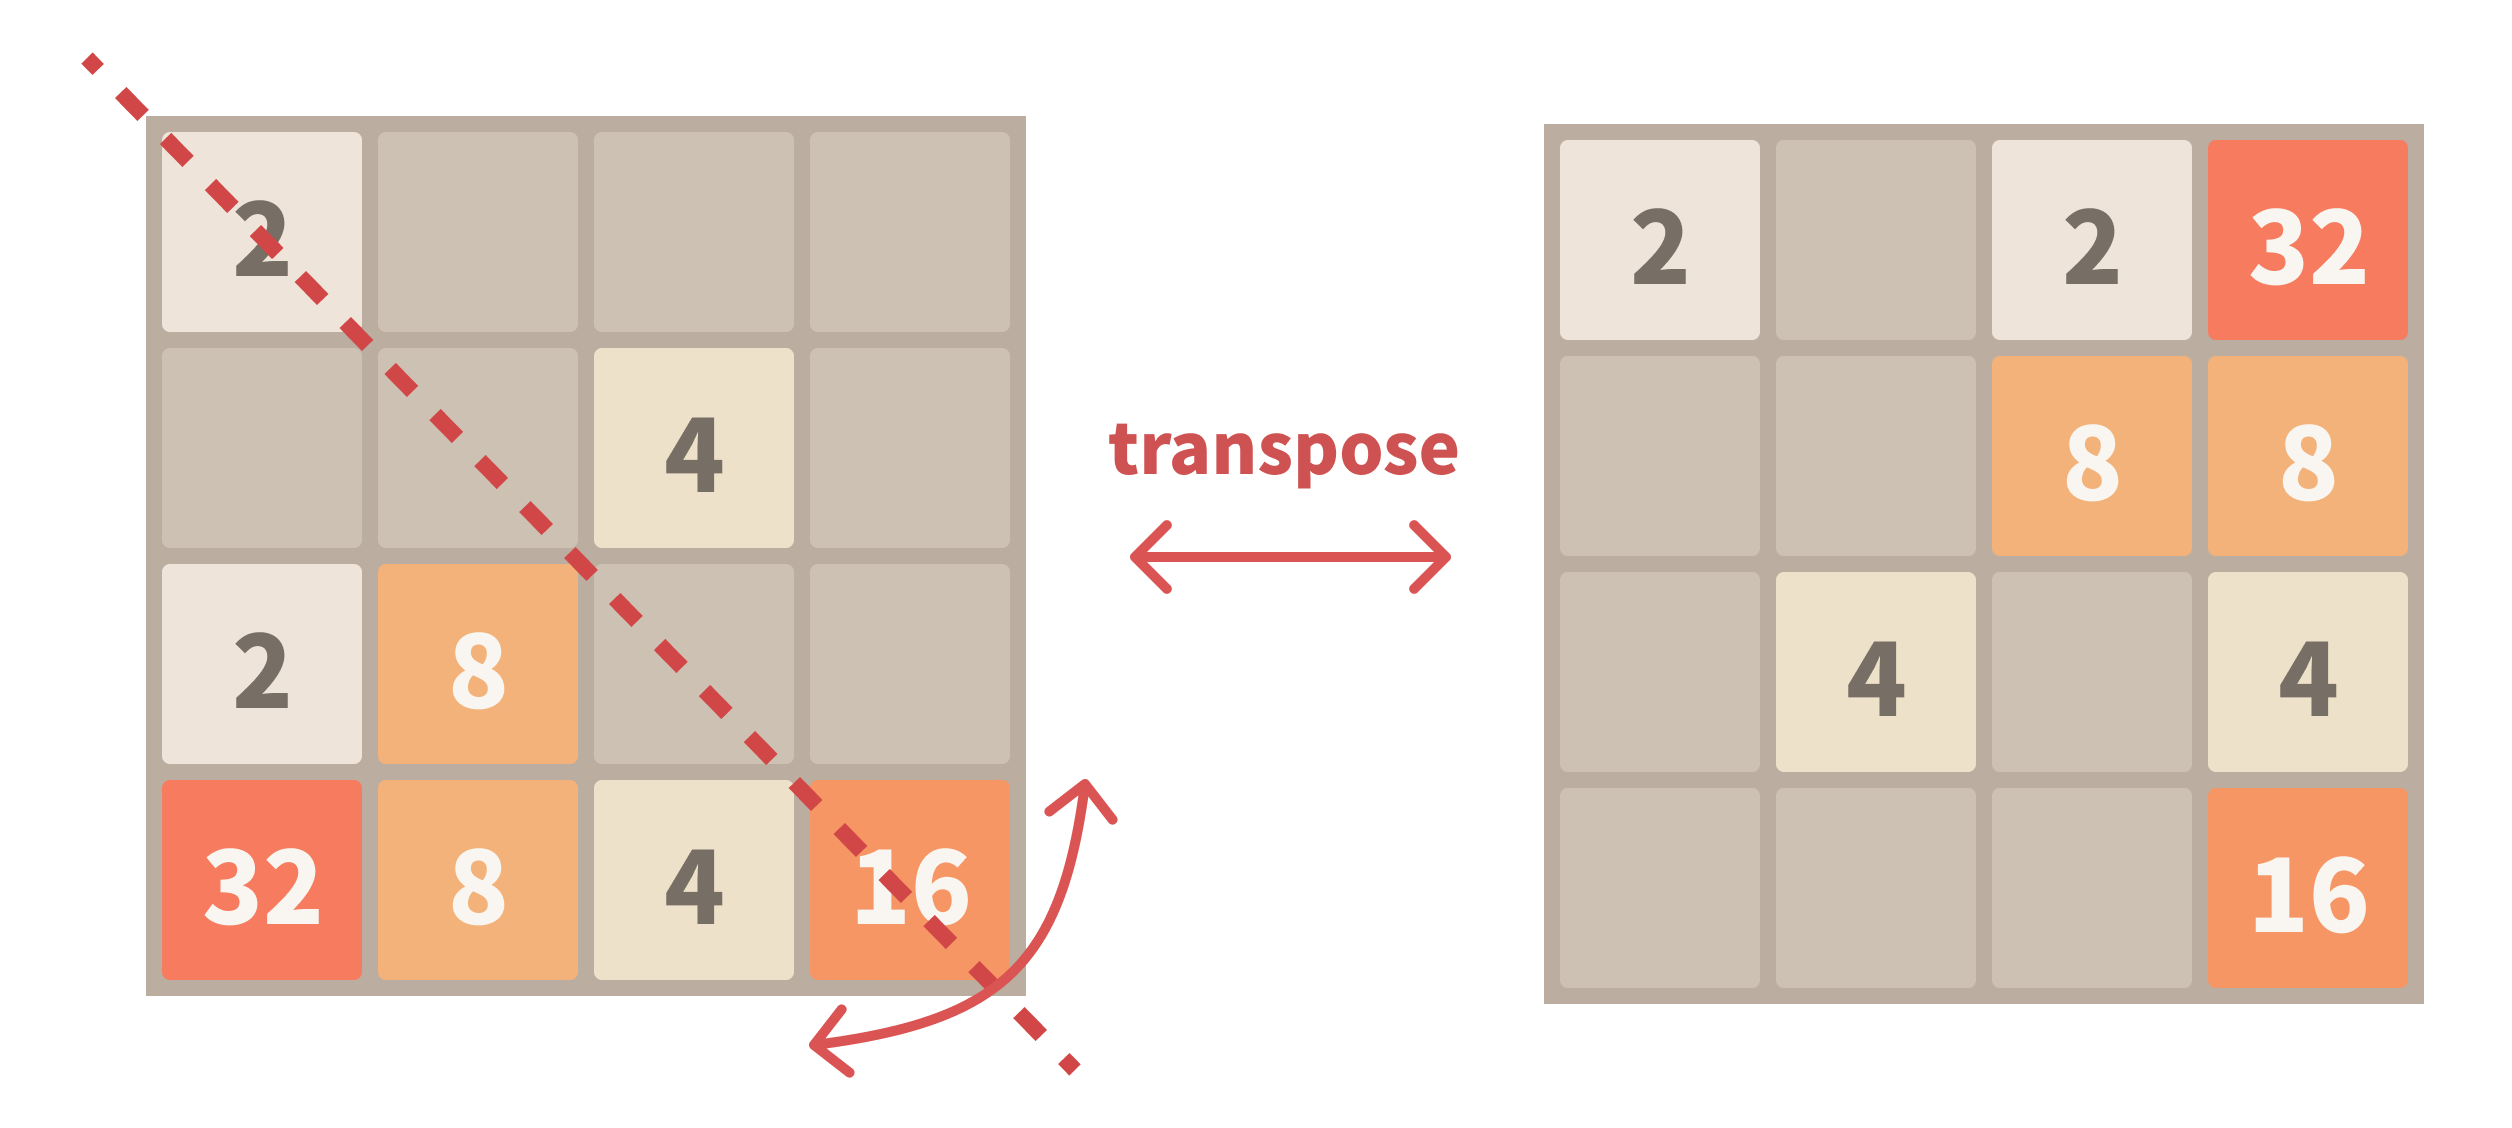
</details>

<details>
<summary>hint 3</summary>
Considering we are doing merge up, that is merging up for each column. If we transpose the orignal grid, how does the merging looks like?
</details>

<details>
<summary>hint 4</summary>

Transpose transformed the problem from merging up to merging left. As the result is transposed compared to the expected result, we can transpose again to get back the expected grid.

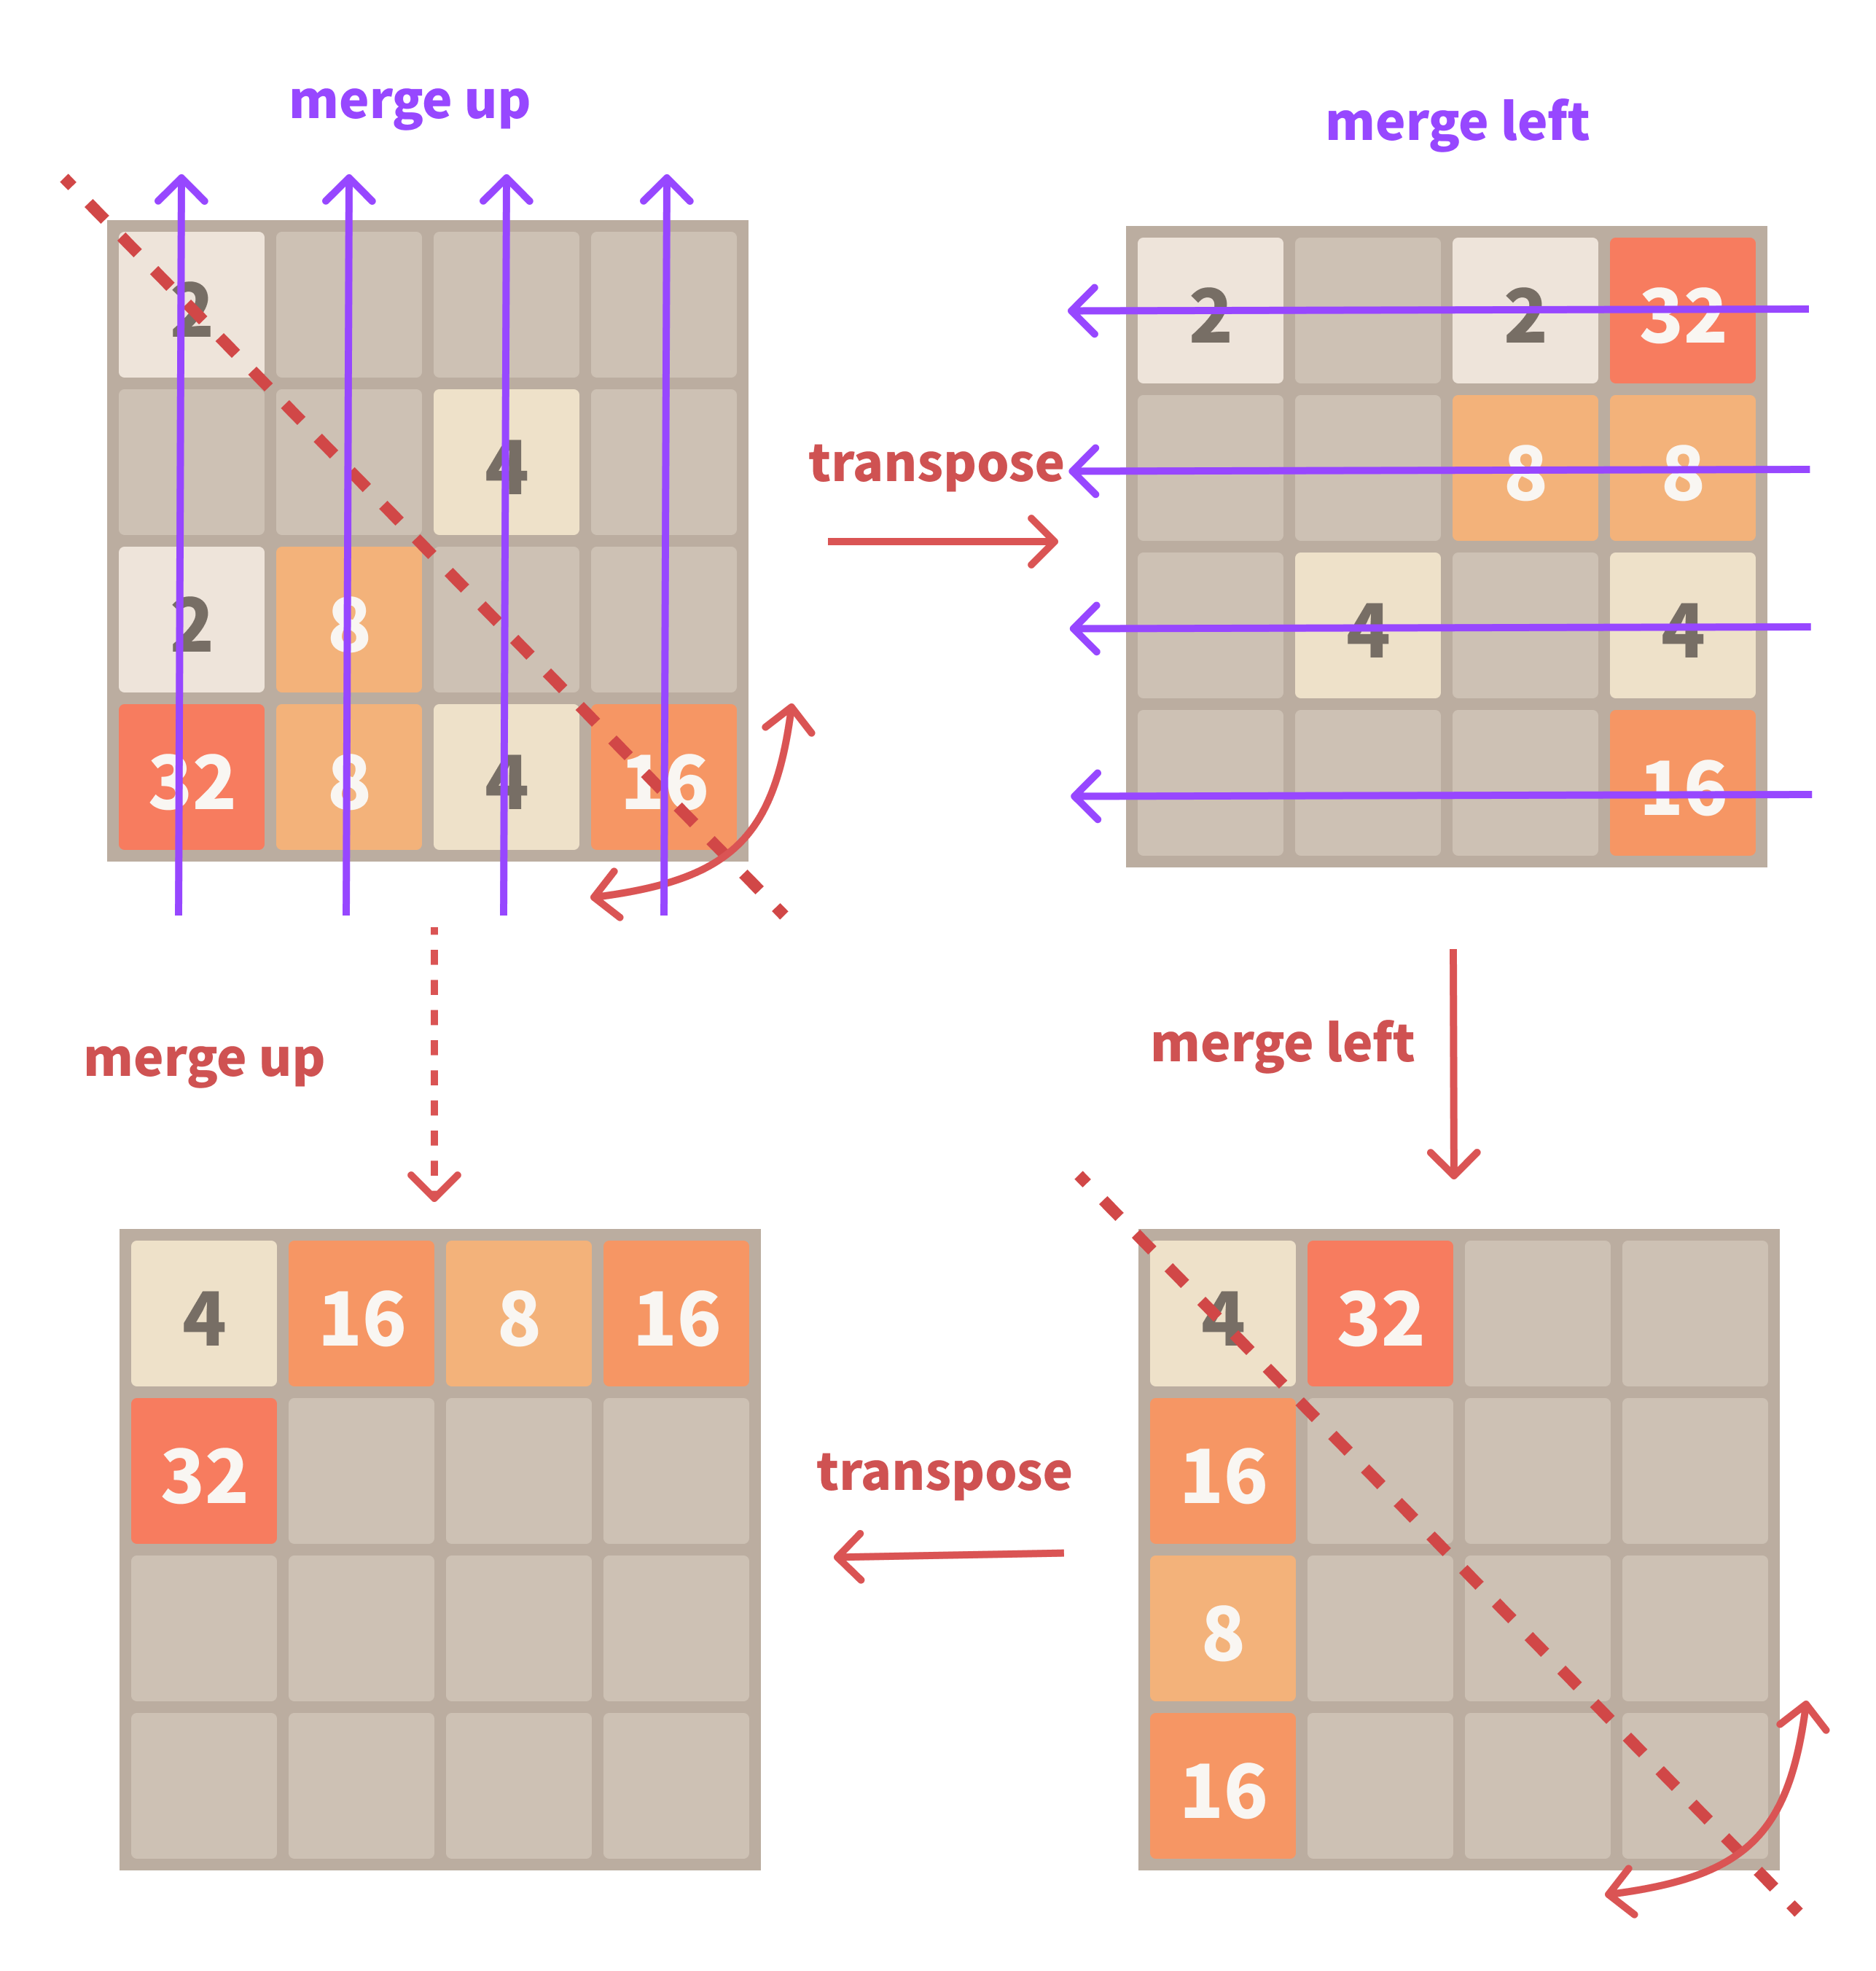
</details>


<details>
<summary>hint 5</summary>

If transpose is too difficult to undersant for you, you can reuse the same thinking of using queue like implementing merge_left, just instead of putting row data into a queue, you put column data into a queue.
</details>

In [ ]:
def merge_grid_up(grid):
    # your implementation here
    return grid

assert_eq(merge_grid_up(
    [
        [None, None, 2, 4],
        [2, 2, 2, 2],
        [None, None, 2, 2],
        [None, 2, 2, 2],
    ]
), [
        [2, 4, 4, 4],
        [None, None, 4, 4],
        [None, None, None, 2],
        [None, None, None, None],
])

### `merge_grid_down(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging down

In [ ]:
def merge_grid_down(grid):
    # your implementation here
    return grid

assert_eq(merge_grid_down(
    [
        [None, None, 2, 4],
        [2, 2, 2, 2],
        [None, None, 2, 2],
        [None, 2, 2, 2],
    ]
), [
        [None, None, None, None],
        [None, None, None, 4],
        [None, None, 4, 2],
        [2, 4, 4, 4],
])

## Step 5 - generate the next number

After swiping and merging the numbers, we should generate a `2` or a `4` at a random empty space. We can create a `generate_next_location` function to choose a coordinate for such place. We should use `(rowid, colid)` format so that we can access the corresponding cell in `grid[rowid][colid]` format.


### `generate_next_location(grid)`

* `grid` is the current 4x4 grid
* it should return `(rowid, colid)` which is a `(int, int)` tuple, where `grid[rowid][colid]` is None

<details>
<summary>hint 1</summary>

`randint(a, b)` returns a random number between `a` and `b`, including `a` and `b`
</details>

In [ ]:
from random import randint

def generate_next_location(grid):
    # your implementation here
    return (0, 0)


grid1 = [
    create_empty_row(),
    [2, 2, 2, 2],
    create_empty_row(),
    [2, 2, 2, 2],
]
for _ in range(3):
    assert_eq(generate_next_location(grid1)[0] % 2, 0)

grid2 = [
    [2, 2, 2, 2],
    create_empty_row(),
    [2, 2, 2, 2],
    create_empty_row(),
]
for _ in range(3):
    assert_eq(generate_next_location(grid2)[0] % 2, 1)

grid3 = [
    [None, 2, None, 2],
    [None, 2, None, 2],
    [None, 2, None, 2],
    [None, 2, None, 2],
]
for _ in range(3):
    assert_eq(generate_next_location(grid3)[1] % 2, 0)

grid4 = [
    [2, None, 2, None],
    [2, None, 2, None],
    [2, None, 2, None],
    [2, None, 2, None],
]
for _ in range(3):
    assert_eq(generate_next_location(grid4)[1] % 2, 1)



## Step 6 - assign new number to the generated location

Now use the `generate_next_location`, create a function `put_next_number` that accept a grid, return a new grid which one of the `None` value in the original grid now become either `2` or `4`

### `put_next_number(grid)`

* `grid` is the current 4x4 grid
* it should return a new grid where one of the `None` in original grid is now `2` or `4`

In [ ]:
def put_next_number(grid):
    # your implementation here
    return grid

result = put_next_number(grid4)
assert_next_grid(result, grid4)

## Step 7 - detect endgame

so the game will come to an end, we need to be able to detect it. Implement a function `detect_endgame` which accept the grid as parameter, when there is a 2048 in the grid, return `WIN`. if there is no possible move, return `LOSE`, otherwise, return `None` to indicate the game is still in progress

### `detect_endgame(grid)`

* `grid` is the current 4x4 grid
* it should return either `WIN`, `LOSE` or `None`

<details>
<summary>hint 1</summary>

Grid fully filled with number doesnt lose the game immediately, we need the grid to be both filled and no mergable numbers to lose.
</details>

<details>
<summary>hint 2</summary>

Can we reuse `merge_grid_left` and `merge_grid_up` here? 
</details>

<details>
<summary>hint 2</summary>

We dont need to check every neighboring numbers explicitly, we can compare the grid after merging left/right/etc with the original grid. if the grids of before and after merging are the same, that means there are no mergable numbers at that direction.
</details>

In [ ]:
WIN = 'win'
LOSE = 'lose'

def detect_endgame(grid):
    # your implementation here
    return None

assert_eq(detect_endgame(create_empty_grid()), None)
assert_eq(detect_endgame([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
]), None)
assert_eq(detect_endgame([
    [4,4,2,4],
    [8,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
]), None)
assert_eq(detect_endgame([
    [4,8,2,4],
    [4,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
]), None)
assert_eq(detect_endgame([
    [2,4,2,4],
    [4,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
]), LOSE)
assert_eq(detect_endgame([
    [2,4,2,4],
    [4,2,4,2],
    [2,4,2,4],
    [4,2,4,2048],
]), WIN)

## Step 8 - preparation work for putting everything together

Now we have all the essential parts done and we are moving on to set up interactive UI so that we can really play the 2048 game with the parts we built together. Before that we need to first ensure some dependencies are installed so that we can start a UI inside the jupyter notebook, just simply run the following cells

In [ ]:
try:
    import ipywidgets
except:
    !pip install ipywidgets
    import ipywidgets

In [ ]:
%load_ext autoreload
%autoreload 2

from ui2048 import start_game, UP, DOWN, LEFT, RIGHT

## Step 9 - The last bit to play 2048

We have already done all the heavy lifting of UI set up and wiring for you in the `ui2048` package, and your task is to write handlers for all the UI buttons, which are the new game and swipe buttons. All the handlers should return a dictionary containing the 4x4 `grid` and `result` should be `WIN`, `LOSE` or `None` (game in progress), and then the UI will rerender accordingly after the handlers are involked.

### `on_new_game_button_clicked_handler`:

* it should return a dictionary contains two values: `grid` is a 4x4 2d array ,should contain a initial number, the rest is `None`. `result` should be `None`

In [ ]:
def on_new_game_button_clicked_handler():
    # your implementation here
    return {
        "grid": None, # replace None with the new grid
        "result": None, # result should be None
    }

result = on_new_game_button_clicked_handler()

assert_next_state(result, {'grid': create_empty_grid(), 'result': None})

### `on_swipe_handler`

* `grid` is the current 4x4 grid
* `direction` is one of the `UP`, `DOWN`, `LEFT`, `RIGHT` value indicating the direction swiped and the grid should merge to
* it should return a next game state object: `grid` should contains the grid after merging. `result` should indicate whether the game is `WIN`, `LOSE` or `None` (in progress). If the swipping direction is invalid, that is no number is moveble to that direction, do not put a new number into the grid


In [ ]:
def on_swipe_handler(grid, direction):
    # your implemenation here
    return {
        "grid": None, # replace None with the new grid
        "result": None, # replace None with the game result
    }

# different direction should trigger corresponding merge grid function
initial_grid = [
    [None, None, 2, 4],
    [2, 2, 2, 2],
    [None, None, 2, 2],
    [None, 2, 2, 2],
]
assert_next_state(on_swipe_handler(initial_grid, UP), {
    'grid': [
        [2, 4, 4, 4],
        [None, None, 4, 4],
        [None, None, None, 2],
        [None, None, None, None],
    ],
    'result': None,
})
assert_next_state(on_swipe_handler(initial_grid, DOWN), {
    'grid': [
        [None, None, None, None],
        [None, None, None, 4],
        [None, None, 4, 2],
        [2, 4, 4, 4],
    ],
    'result': None,
})
assert_next_state(on_swipe_handler(initial_grid, LEFT), {
    'grid': [
        [2, 4, None, None],
        [4, 4, None, None],
        [4, None, None, None],
        [4, 2, None, None],
    ],
    'result': None,
})
assert_next_state(on_swipe_handler(initial_grid, RIGHT), {
    'grid': [
        [None, None, 2, 4],
        [None, None, 4, 4],
        [None, None, None, 4],
        [None, None, 2, 4],
    ],
    'result': None,
})

# cannot further merge after swiping imply a LOSE
assert_next_state(on_swipe_handler([
    [8,8,2,4],
    [16,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
], RIGHT), {
    'grid': [
        [None,16,2,4],
        [16,2,4,2],
        [2,4,2,4],
        [4,2,4,2],
    ],
    'result': LOSE,
})

# merge to 2048 imply a WIN
assert_next_state(on_swipe_handler([
    [1024,1024,2,4],
    [16,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
], RIGHT), {
    'grid': [
        [None,2048,2,4],
        [16,2,4,2],
        [2,4,2,4],
        [4,2,4,2],
    ],
    'result': WIN,
})

# if the direction is invalid, no new number generated, but the state is still reported
result = on_swipe_handler([
    [None,2048,2,4],
    [16,2,4,2],
    [2,4,2,4],
    [4,2,4,2],
], RIGHT)
assert_eq(result['grid'], [
        [None,2048,2,4],
        [16,2,4,2],
        [2,4,2,4],
        [4,2,4,2],
    ])
assert_eq(result['result'], WIN)

## Step 10 - Start the game with our handlers

Enjoy the game!

In [ ]:
start_game(on_new_game_button_clicked_handler, on_swipe_handler)

## Extra credits

Can you extend the game to support bigger grid and higher goal? Like a 6x6 game that aims for 8192?